In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.rcParams['figure.figsize'] = [18, 14]
plt.rcParams['figure.dpi'] = 100

In [3]:
 # Read the dataset
print("Reading matomo dataset")
mat = pd.read_csv('../data/matomo.csv', dtype=np.int32)

Reading matomo dataset


In [44]:
# Cria uma matriz de correlação
corr_matrix = mat.corr()

<AxesSubplot:>

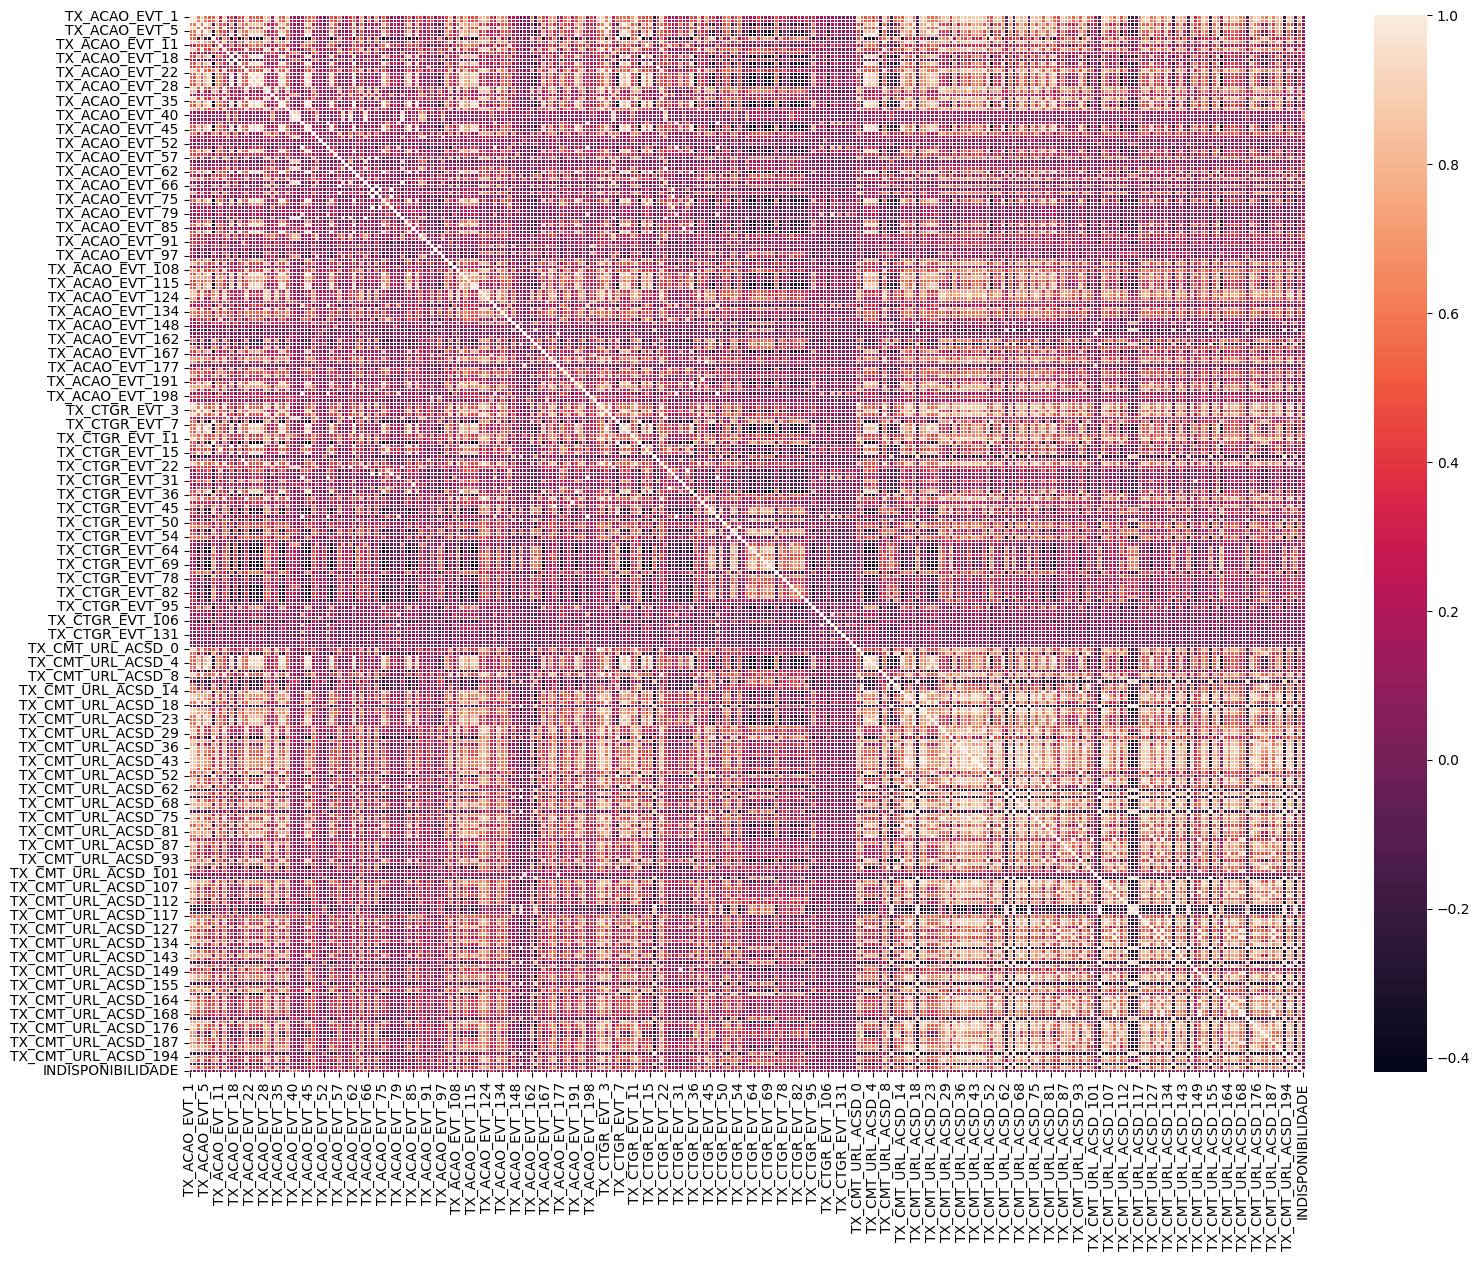

In [46]:
# Apresentando o mapa de calor da correlação
sns.heatmap(corr_matrix,  linewidths=.5)

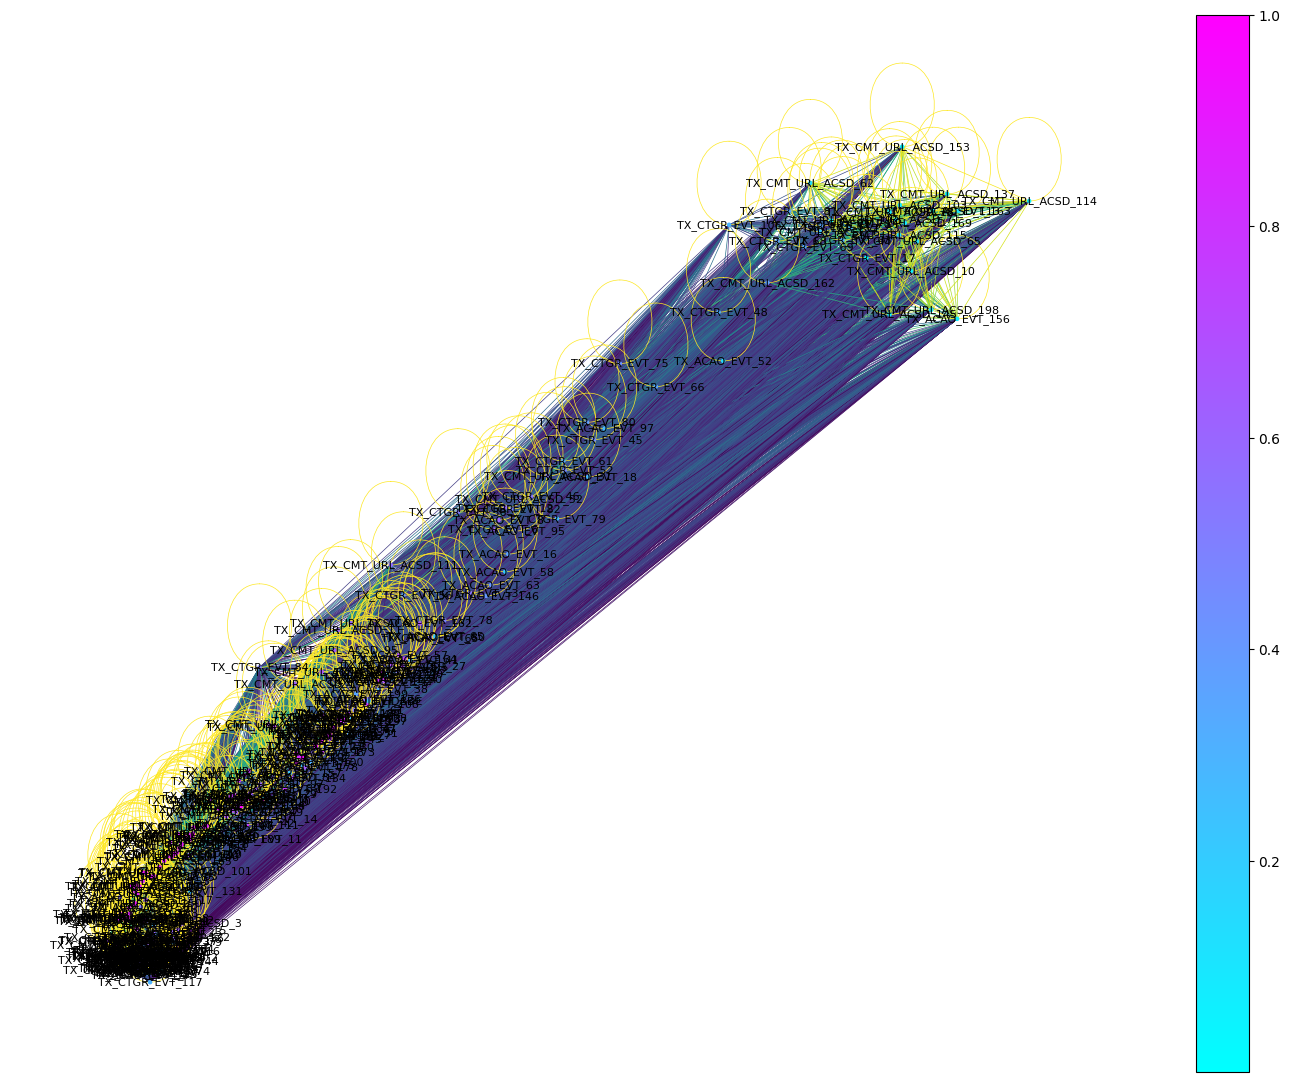

In [16]:
# Cria um grafo a partir da matriz de correlação
G = nx.from_numpy_matrix(corr_matrix.values)

# Adiciona os nomes das variáveis como rótulos dos nós
mapping = {i: corr_matrix.columns[i] for i in range(len(corr_matrix.columns))}
G = nx.relabel_nodes(G, mapping)

# Define as cores dos nós e das arestas
node_colors = [corr_matrix[var]['TX_ACAO_EVT_1'] for var in corr_matrix.columns]
edge_colors = [abs(corr_matrix[var1][var2]) for var1, var2 in G.edges()]

# Cria o gráfico de rede
pos = nx.spring_layout(G, seed=42) # Define a posição dos nós
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap='cool', node_size=5)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

# Adiciona uma barra de cores para as arestas
sm = plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors)))
sm._A = []
plt.colorbar(sm)

# Exibe o gráfico
plt.axis('off')
plt.show()

In [10]:
def select_random_columns(df):
    np.random.seed(1)
    if len(df.columns) <= 15:
        return df
    else:
        random_columns = np.random.choice(df.columns, size=20, replace=False)
        return df[random_columns]

In [11]:
sample_mat = select_random_columns(mat.drop(["INDISPONIBILIDADE"], axis=1))
sample_mat = pd.concat([sample_mat.reset_index(drop=True),
                    mat['INDISPONIBILIDADE'].reset_index(drop=True)], axis=1) 
sample_mat

,TX_CMT_URL_ACSD_10,TX_CTGR_EVT_14,TX_CMT_URL_ACSD_5,TX_CMT_URL_ACSD_45,TX_ACAO_EVT_194,TX_CTGR_EVT_19,TX_CTGR_EVT_131,TX_ACAO_EVT_110,TX_CMT_URL_ACSD_153,TX_CMT_URL_ACSD_95,...,TX_CTGR_EVT_53,TX_CMT_URL_ACSD_199,TX_ACAO_EVT_81,TX_CTGR_EVT_13,TX_ACAO_EVT_118,TX_ACAO_EVT_17,TX_CTGR_EVT_86,TX_CMT_URL_ACSD_62,TX_ACAO_EVT_41,INDISPONIBILIDADE
0,66947,6050,0,0,23,2624,0,0,1297,0,...,20,0,0,0,61,421,0,3345,433,0
1,66270,5924,0,0,12,2582,0,0,1370,0,...,24,0,0,0,70,342,0,3250,484,0
2,67236,5687,0,0,9,2587,0,0,1331,0,...,29,0,0,0,67,315,0,3511,489,0
3,66445,5617,0,0,20,2529,0,0,1347,0,...,30,0,0,0,74,362,0,3481,483,0
4,66770,5550,0,0,22,2545,0,0,1455,0,...,23,0,0,0,81,282,0,3572,478,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,441,21098,54595,4269,55,3445,0,267,8,40,...,17,173,22,23952,88,18039,368,18,804,0
799996,477,21289,54379,3991,52,3259,0,272,4,22,...,12,162,36,23141,78,17439,440,19,840,0
799997,508,21312,54889,3961,60,3189,0,287,9,25,...,8,161,43,23058,83,17410,378,8,788,0
799998,473,21121,54619,4106,66,3394,0,269,2,26,...,13,204,15,23019,83,17363,398,15,806,0


In [12]:
# Cria uma matriz de correlação
corr_matrix = sample_mat.corr()

<AxesSubplot:>

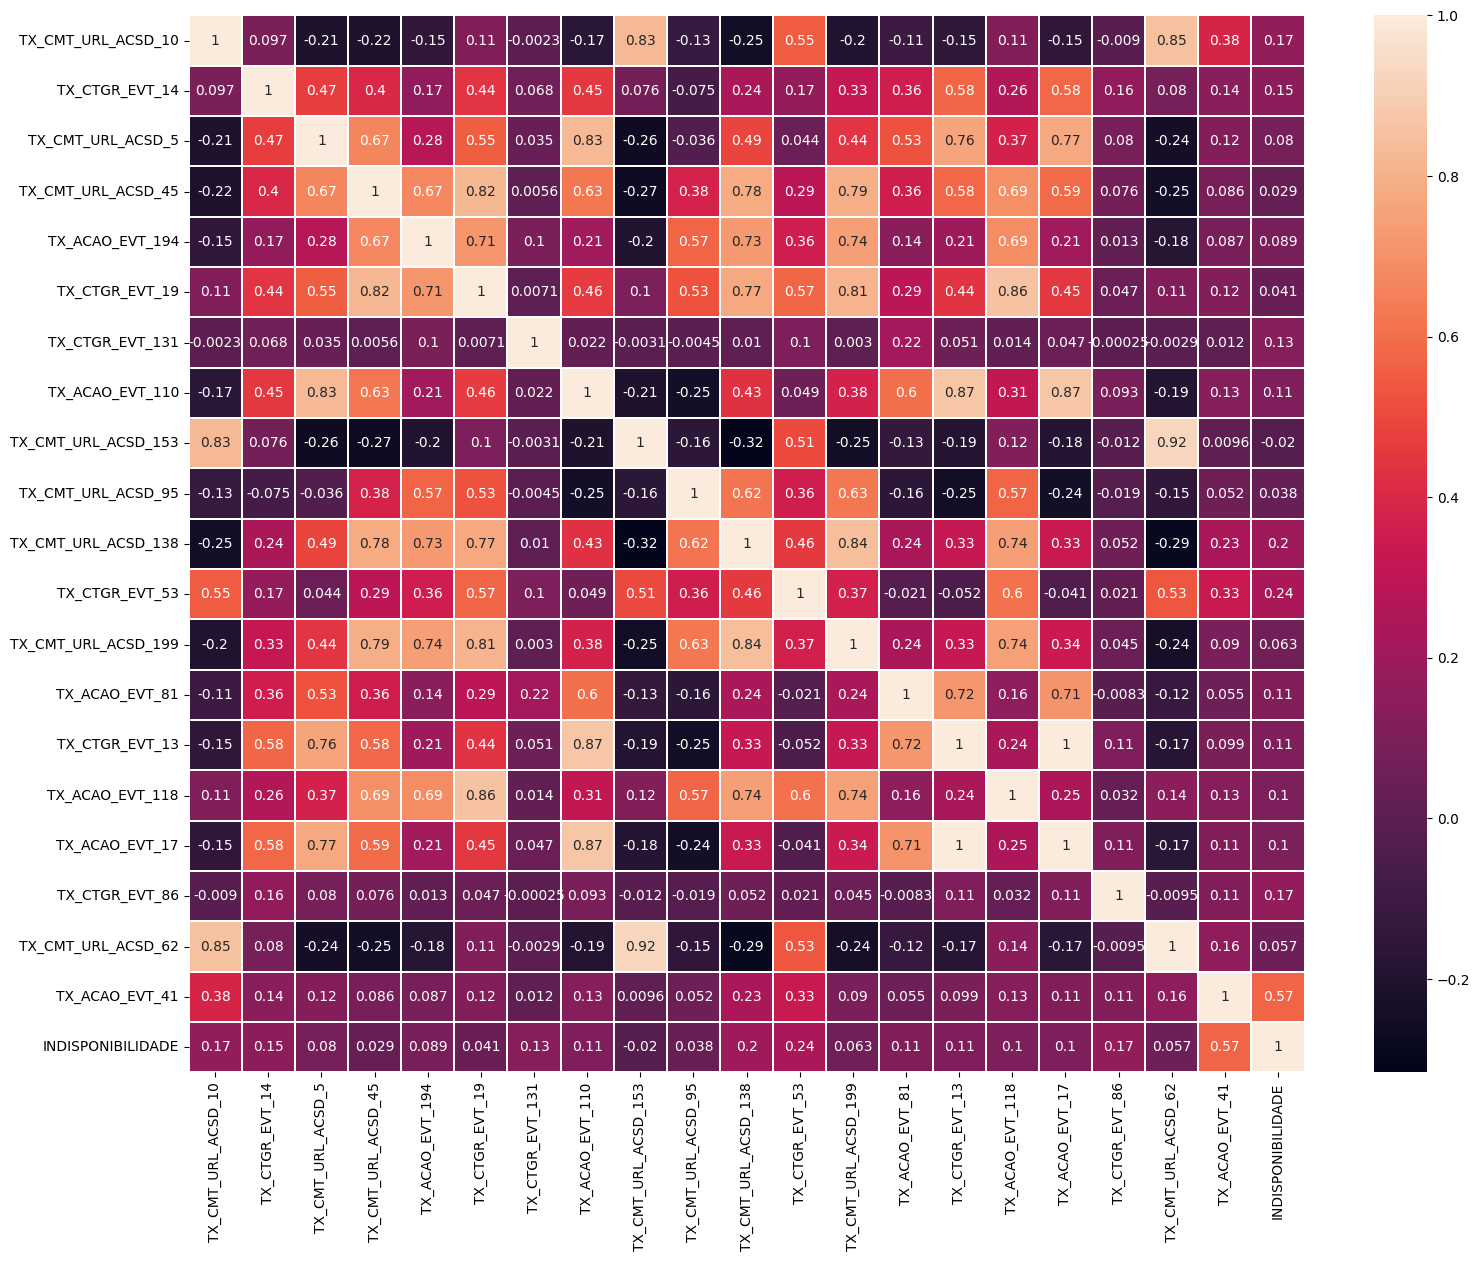

In [13]:
# Apresentando o mapa de calor da correlação
sns.heatmap(corr_matrix, annot=True,  linewidths=.3)

In [95]:
sample_mat.describe()

,TX_CMT_URL_ACSD_10,TX_CTGR_EVT_14,TX_CMT_URL_ACSD_5,TX_CMT_URL_ACSD_45,TX_ACAO_EVT_194,TX_CTGR_EVT_19,TX_CTGR_EVT_131,TX_ACAO_EVT_110,TX_CMT_URL_ACSD_153,TX_CMT_URL_ACSD_95,TX_CMT_URL_ACSD_138,TX_CTGR_EVT_53,TX_CMT_URL_ACSD_199,TX_ACAO_EVT_81,TX_CTGR_EVT_13,INDISPONIBILIDADE
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,5592.952069,2617.285435,14478.358030,1034.456225,42.704352,1621.311891,0.053442,58.986641,106.582920,347.930114,217.877514,10.062445,112.852716,152.646771,4078.949355,0.003883
std,17219.750389,4492.236338,19478.259968,1158.963186,46.289504,1246.634594,6.030383,101.875823,279.226232,538.930538,199.966740,9.744912,128.095327,420.420118,7740.751962,0.062189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,242.000000,365.000000,0.000000,51.000000,7.000000,429.000000,0.000000,0.000000,2.000000,10.000000,32.000000,3.000000,13.000000,0.000000,0.000000,0.000000
50%,663.000000,1000.000000,2377.000000,596.000000,27.000000,1378.000000,0.000000,0.000000,9.000000,57.000000,188.000000,8.000000,62.000000,0.000000,0.000000,0.000000
75%,1826.000000,2395.000000,28779.000000,1732.000000,69.000000,2740.000000,0.000000,90.000000,32.000000,498.000000,363.000000,15.000000,172.000000,14.000000,3460.000000,0.000000
max,570040.000000,60641.000000,492800.000000,35704.000000,1542.000000,15329.000000,1536.000000,3092.000000,8439.000000,14366.000000,7293.000000,247.000000,4790.000000,19751.000000,95019.000000,1.000000


In [96]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 12

Text(0, 0.5, 'Média')

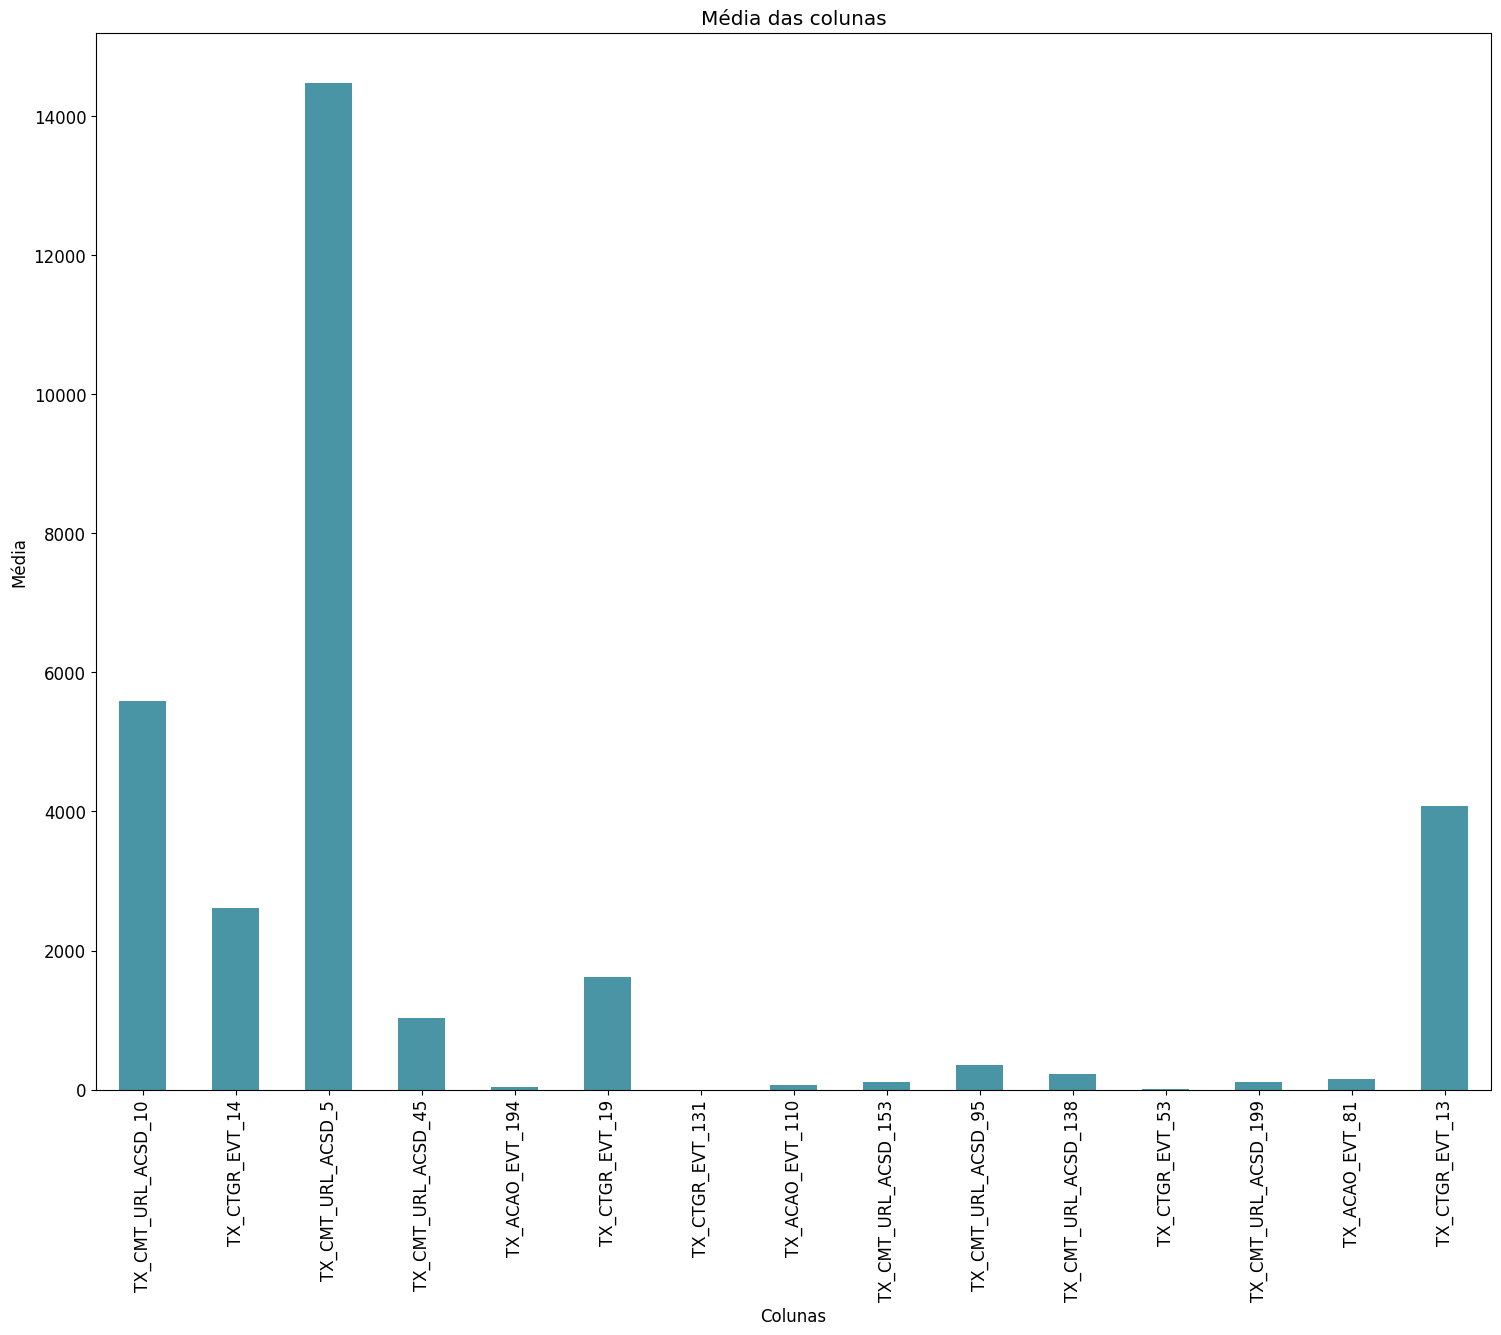

In [97]:

# Calculando as medianas das colunas
mediana_colunas = sample_mat.drop(["INDISPONIBILIDADE"], axis=1).mean()

# Criando o gráfico de barras
ax = mediana_colunas.plot(kind='bar', color='#4a95a5')
plt.subplots_adjust(wspace=0.0001)

# Configurando o título e os eixos do gráfico
plt.title('Média das colunas')
plt.xlabel('Colunas')
plt.ylabel('Média')

Text(0, 0.5, 'Frequência')

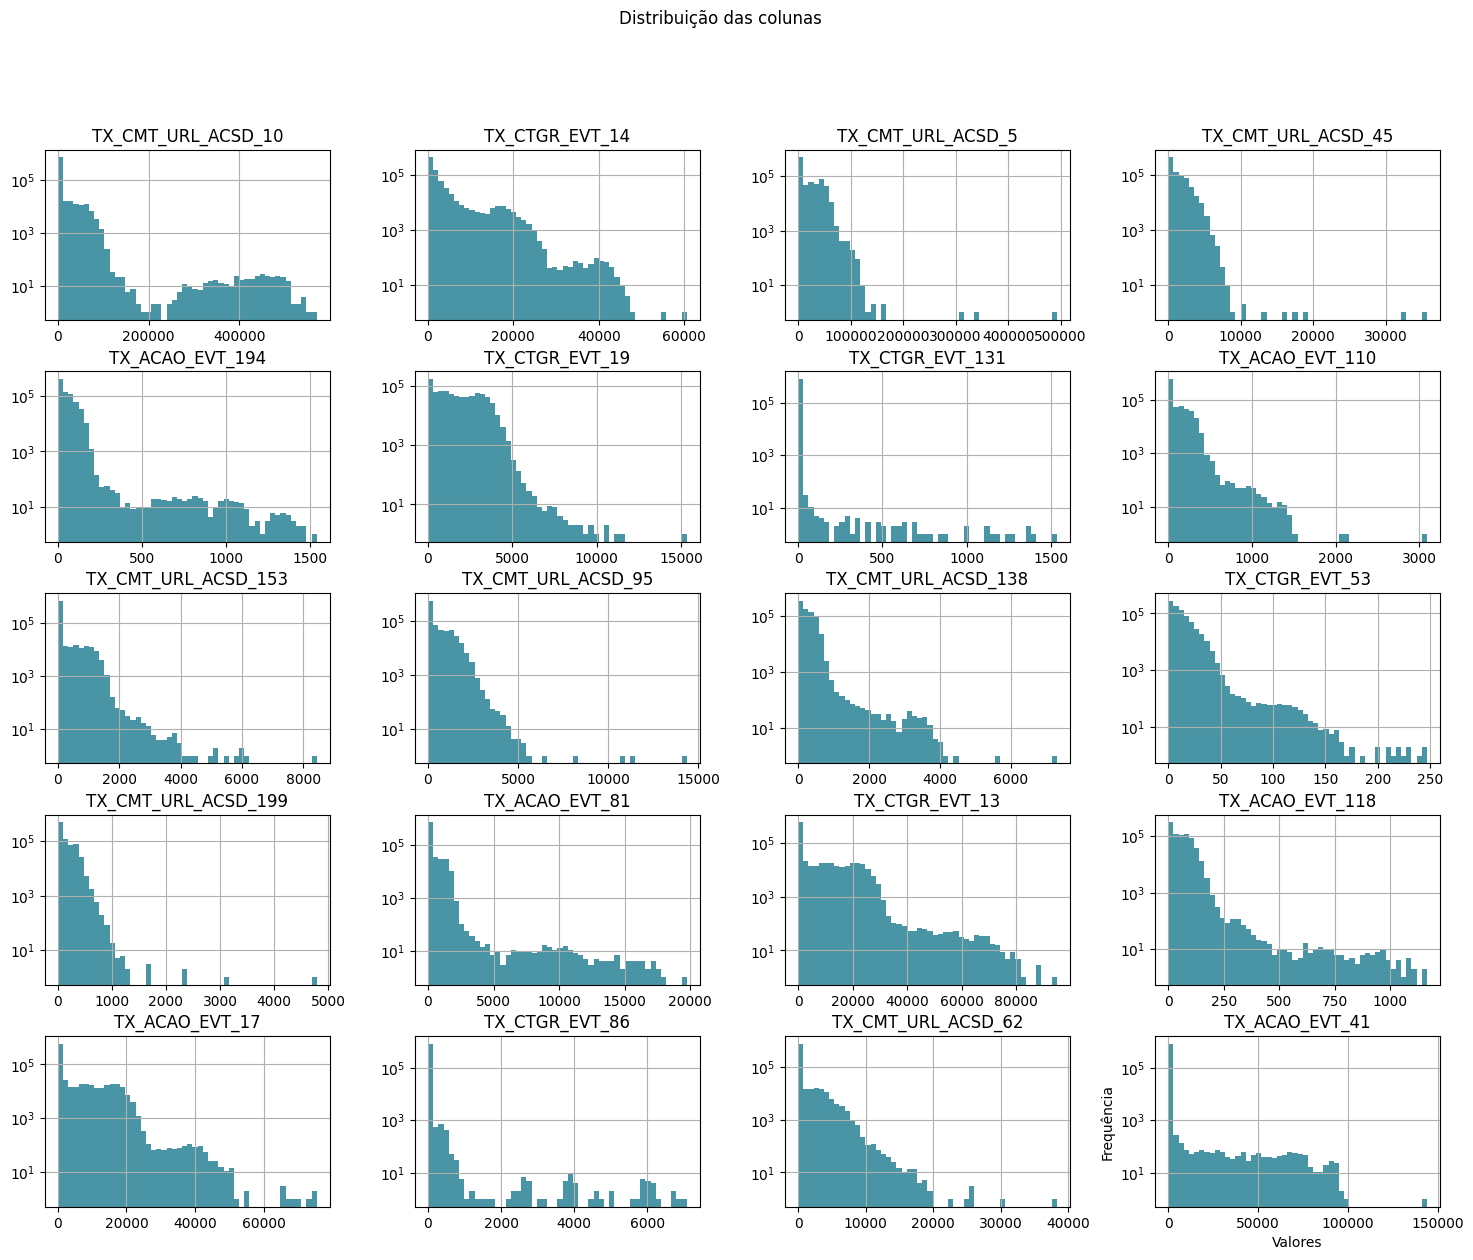

In [16]:
sample_mat.drop(["INDISPONIBILIDADE"], axis=1).hist(bins=50, log=True, color='#4a95a5')

# Calculando a linha da densidade de probabilidade
density = pd.DataFrame({'density': sample_mat['TX_CMT_URL_ACSD_10'].value_counts(normalize=True).sort_index().cumsum()})
#density.plot(kind='line', secondary_y=True, ax=plt.gca())

# Configurando o título e os eixos dos gráficos
plt.suptitle('Distribuição das colunas')
plt.xlabel('Valores')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

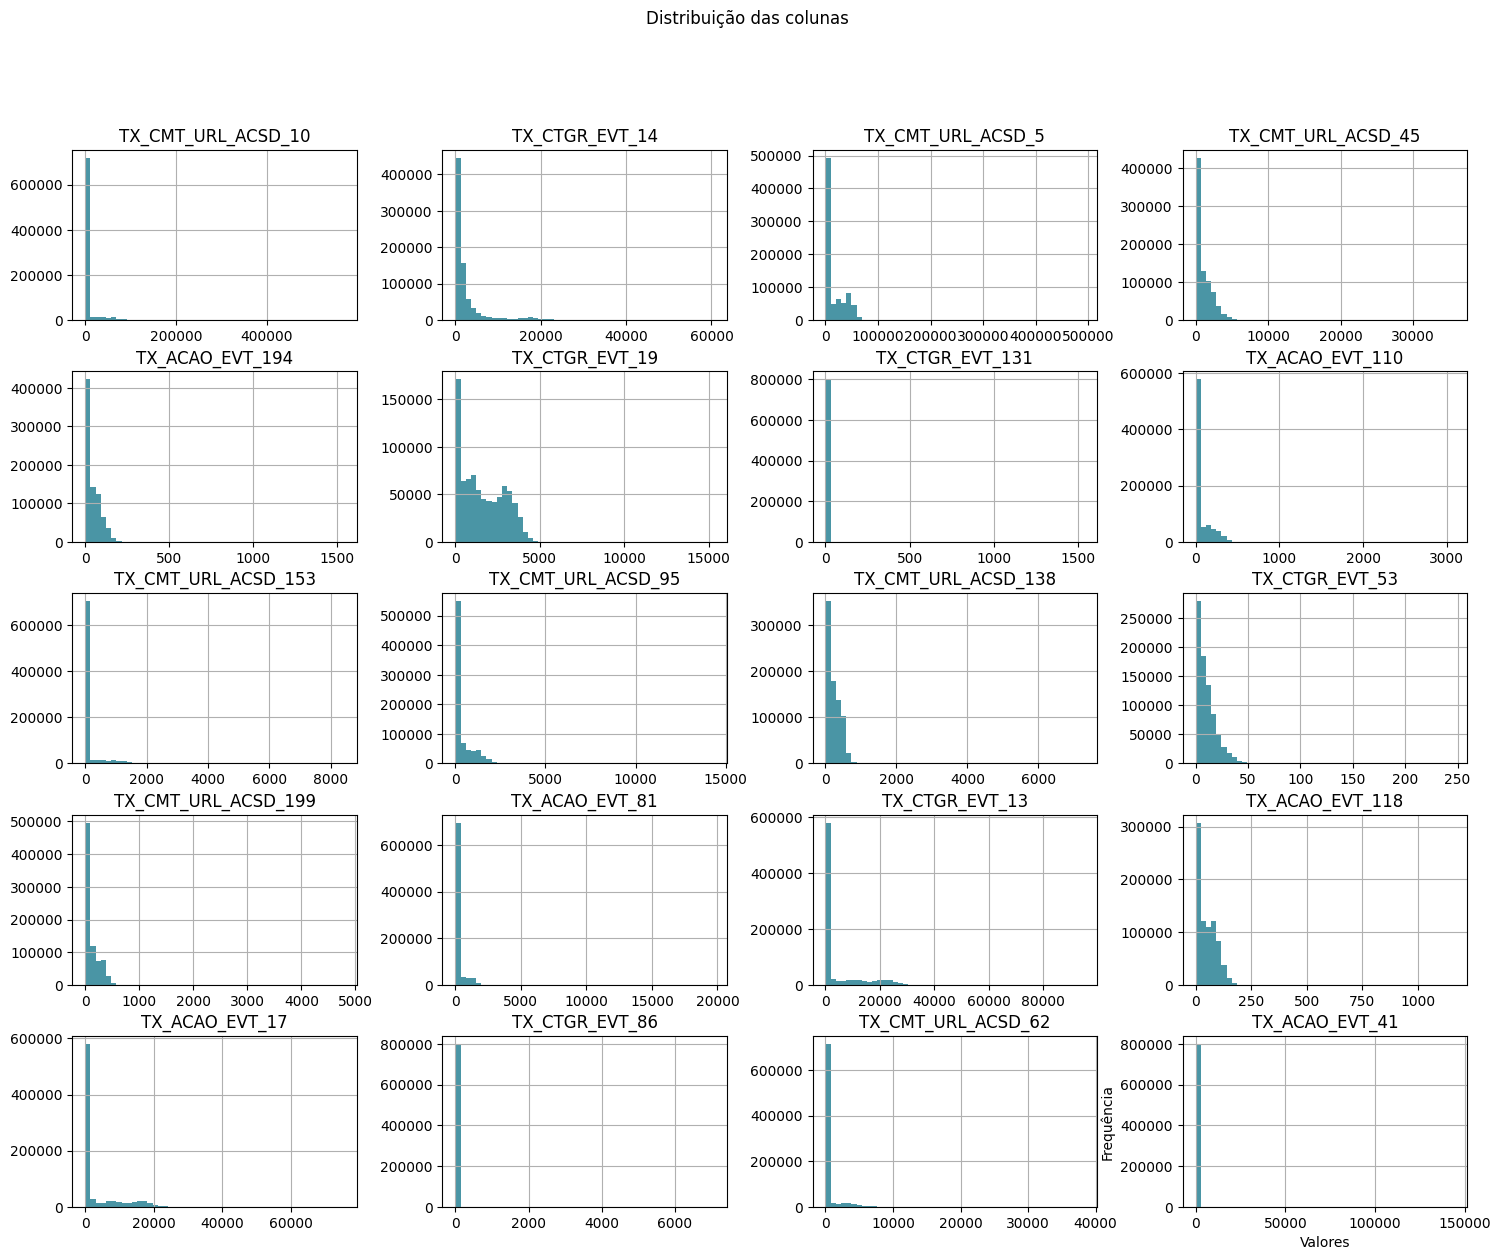

In [17]:
sample_mat.drop(["INDISPONIBILIDADE"], axis=1).hist(bins=50, color='#4a95a5')

# Configurando o título e os eixos dos gráficos
plt.suptitle('Distribuição das colunas')
plt.xlabel('Valores')
plt.ylabel('Frequência')

In [21]:
mat['INDISPONIBILIDADE'].sum() / len(mat)

0.0038825

In [105]:
import pandas as pd

# Criando um dicionário com os padrões de cada grupo e suas respectivas colunas
padroes = {'ACTION': ['ACAO'], 'URL': ['URL'], 'CTGR': ['CTGR']}

# Agrupando as colunas pelo prefixo
grouped = mat.groupby(lambda x: next((k for k, v in padroes.items() if any(p in x for p in v)), x), axis=1)

mat_grouped = grouped.sum()

In [104]:
mat_grouped

,ACTION,CTGR,INDISPONIBILIDADE,URL
0,70089,124306,0,191783
1,69242,123466,0,189952
2,69500,123740,0,191484
3,68983,122767,0,189888
4,69637,124154,0,191952
...,...,...,...,...
799995,545132,534306,0,743269
799996,543055,531717,0,739316
799997,535011,523218,0,728612
799998,541650,529614,0,735835


In [108]:
# Cria uma matriz de correlação
corr_matrix = mat_grouped.corr()

<AxesSubplot:>

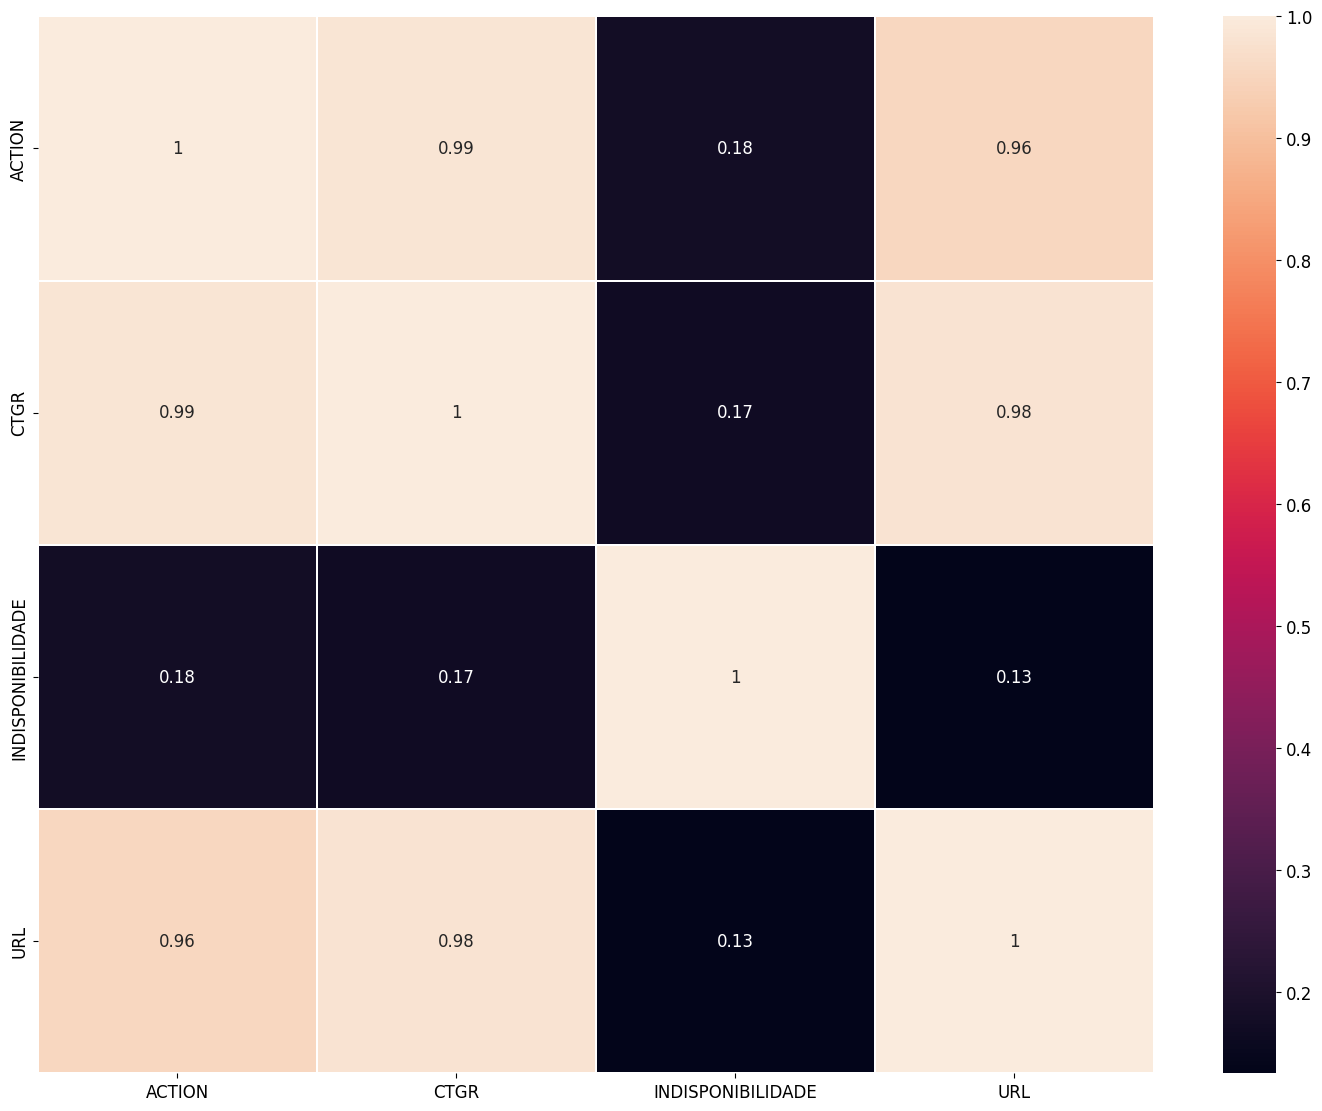

In [109]:
# Apresentando o mapa de calor da correlação
sns.heatmap(corr_matrix, annot=True,  linewidths=.3)

Text(0, 0.5, 'Frequência')

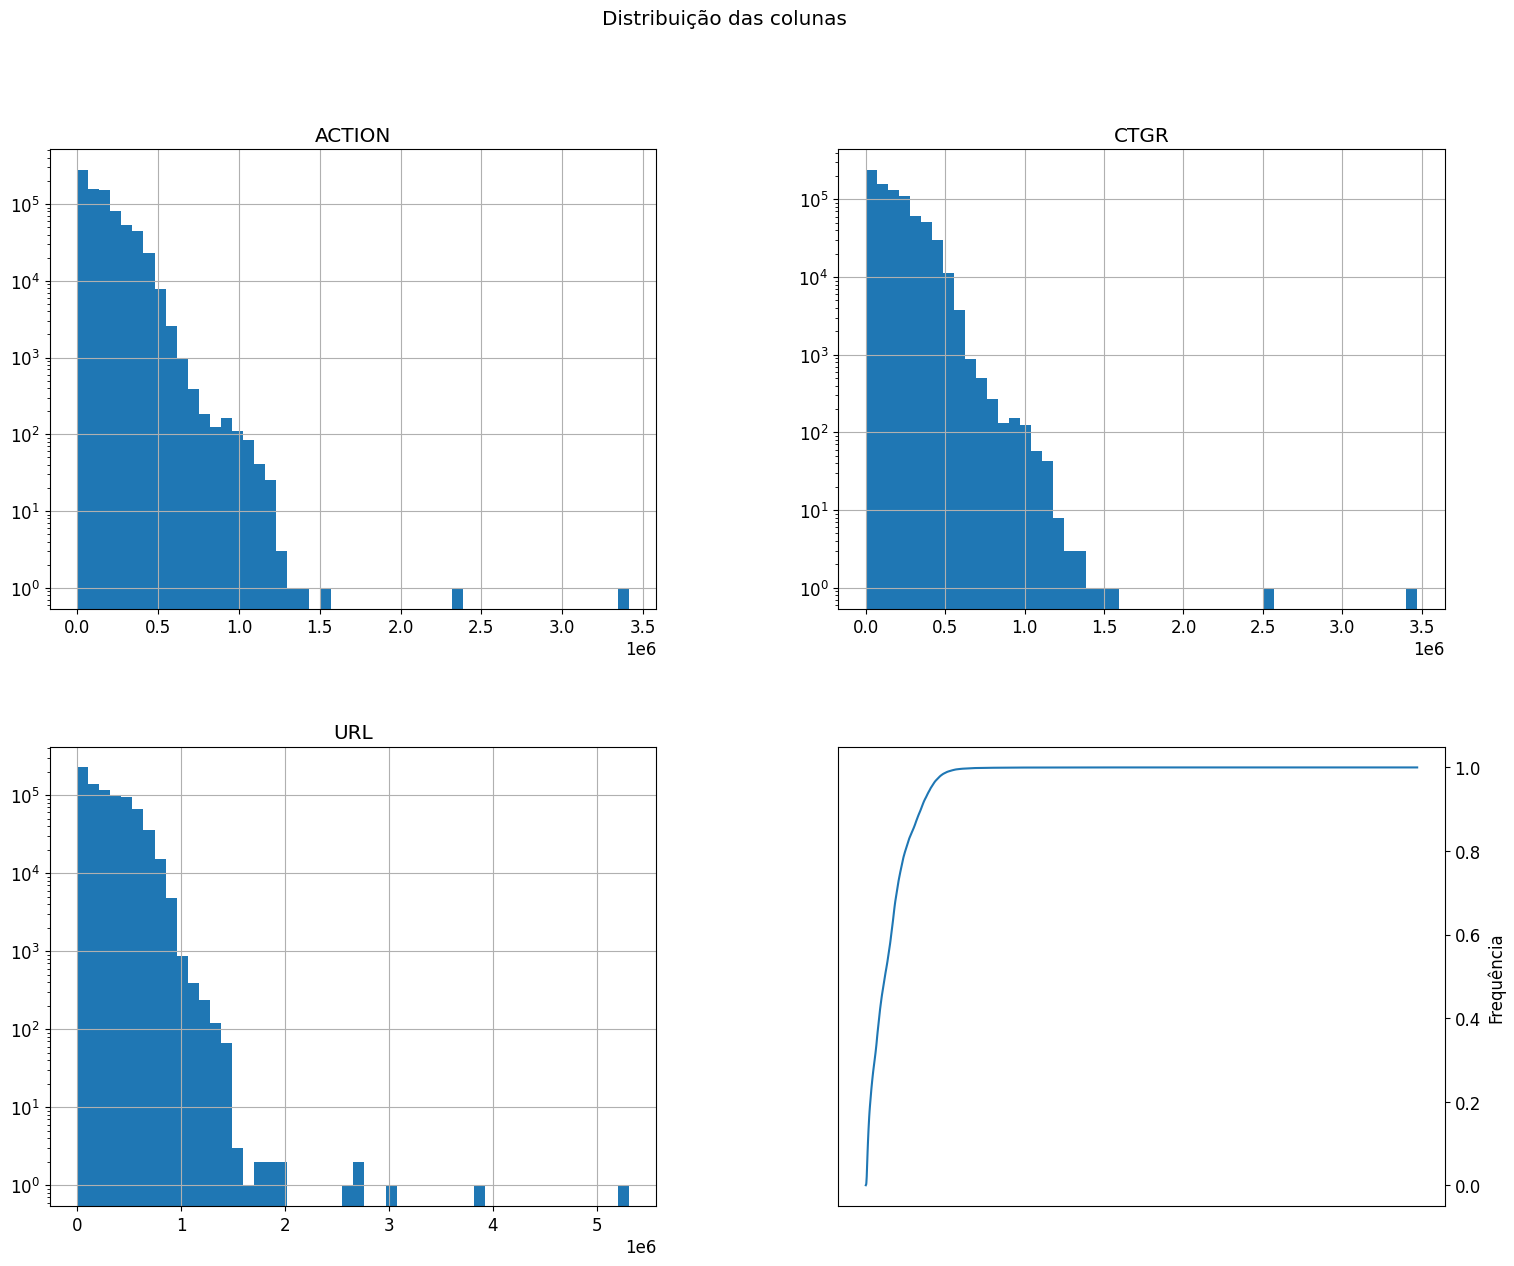

In [110]:
mat_grouped.drop(["INDISPONIBILIDADE"], axis=1).hist(bins=50, log=True)

# Calculando a linha da densidade de probabilidade
density = pd.DataFrame({'density': mat_grouped['ACTION'].value_counts(normalize=True).sort_index().cumsum()})
density.plot(kind='line', secondary_y=True, ax=plt.gca())

# Configurando o título e os eixos dos gráficos
plt.suptitle('Distribuição das colunas')
plt.xlabel('Valores')
plt.ylabel('Frequência')

<AxesSubplot:>

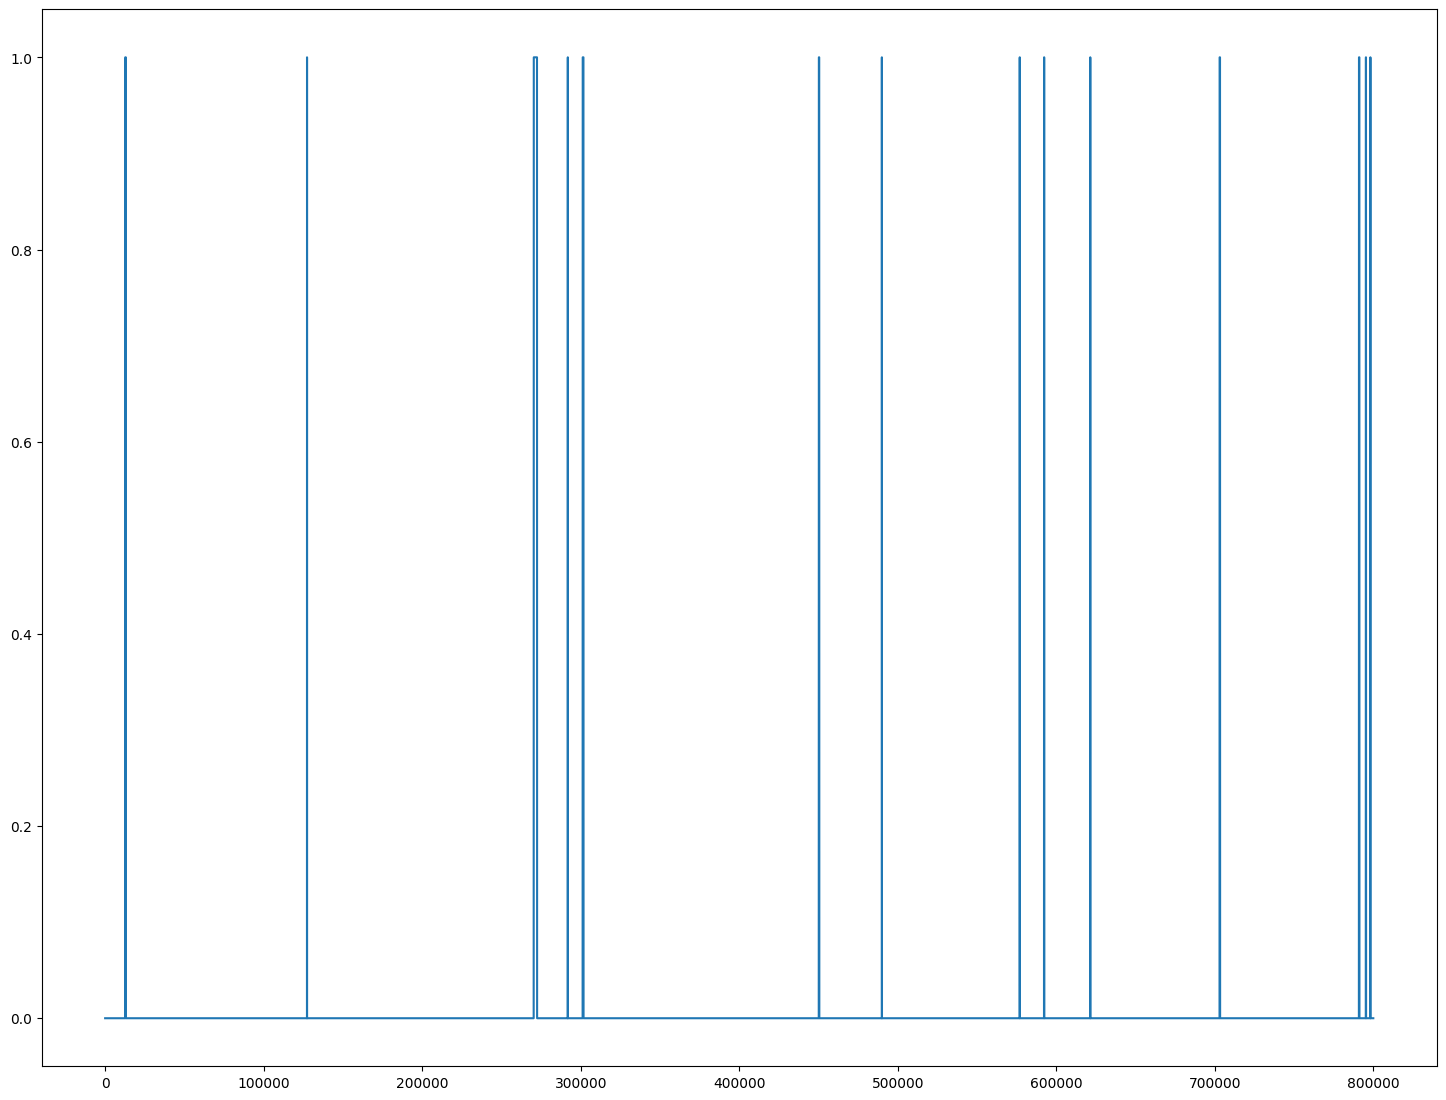

In [15]:
mat['INDISPONIBILIDADE'].plot()

In [9]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 363 entries, TX_ACAO_EVT_0 to INDISPONIBILIDADE
dtypes: int32(363)
memory usage: 1.1 GB


In [10]:
# Gerando a correlação
corr = mat.corr()

In [12]:
corr['INDISPONIBILIDADE'].sort_values()[-30:]

TX_CTGR_EVT_52         0.209007
TX_ACAO_EVT_64         0.220122
TX_ACAO_EVT_78         0.222943
TX_CMT_URL_ACSD_112    0.226539
TX_ACAO_EVT_85         0.245337
TX_CTGR_EVT_32         0.245337
TX_ACAO_EVT_18         0.267746
TX_CMT_URL_ACSD_117    0.291356
TX_ACAO_EVT_126        0.299284
TX_CTGR_EVT_80         0.308079
TX_ACAO_EVT_97         0.320676
TX_ACAO_EVT_16         0.321033
TX_CMT_URL_ACSD_101    0.327661
TX_ACAO_EVT_30         0.353975
TX_ACAO_EVT_58         0.376308
TX_ACAO_EVT_90         0.388657
TX_ACAO_EVT_49         0.401175
TX_CTGR_EVT_61         0.405654
TX_CTGR_EVT_10         0.415614
TX_ACAO_EVT_88         0.418692
TX_ACAO_EVT_80         0.455894
TX_ACAO_EVT_41         0.467729
TX_ACAO_EVT_65         0.468601
TX_CTGR_EVT_22         0.469777
TX_CTGR_EVT_5          0.470826
TX_ACAO_EVT_61         0.493712
TX_ACAO_EVT_40         0.509411
TX_ACAO_EVT_38         0.523327
INDISPONIBILIDADE      1.000000
TX_CTGR_EVT_0               NaN
Name: INDISPONIBILIDADE, dtype: float64

In [13]:
corr['INDISPONIBILIDADE'].sort_values()[:10]

TX_CTGR_EVT_54    -0.043740
TX_CTGR_EVT_51    -0.042129
TX_ACAO_EVT_91    -0.035515
TX_ACAO_EVT_117   -0.033309
TX_CTGR_EVT_72    -0.032556
TX_CTGR_EVT_20    -0.029481
TX_CTGR_EVT_18    -0.029300
TX_ACAO_EVT_20    -0.028729
TX_CTGR_EVT_87    -0.024459
TX_CTGR_EVT_77    -0.024420
Name: INDISPONIBILIDADE, dtype: float64

In [20]:
# Imprimindo variávies que contém todos os valores nulos
print(corr.isnull().all())
# Contando valores nulos
print(corr.isnull().all().sum())

TX_ACAO_EVT_0          False
TX_ACAO_EVT_1          False
TX_ACAO_EVT_2          False
TX_ACAO_EVT_3          False
TX_ACAO_EVT_4          False
                       ...  
TX_CMT_URL_ACSD_118    False
TX_CMT_URL_ACSD_119    False
tx_tip_acao1           False
tx_tip_acao2           False
INDISPONIBILIDADE      False
Length: 363, dtype: bool
1


In [21]:
corr.isnull().all().sum()

1

In [24]:
nulos = corr.isnull().all()[corr.isnull().all()].index.tolist()
mat.drop(nulos, axis=1, inplace=True)
nulos

['TX_CTGR_EVT_0']

In [25]:
mat

,TX_ACAO_EVT_0,TX_ACAO_EVT_1,TX_ACAO_EVT_2,TX_ACAO_EVT_3,TX_ACAO_EVT_4,TX_ACAO_EVT_5,TX_ACAO_EVT_6,TX_ACAO_EVT_7,TX_ACAO_EVT_8,TX_ACAO_EVT_9,...,TX_CMT_URL_ACSD_113,TX_CMT_URL_ACSD_114,TX_CMT_URL_ACSD_115,TX_CMT_URL_ACSD_116,TX_CMT_URL_ACSD_117,TX_CMT_URL_ACSD_118,TX_CMT_URL_ACSD_119,tx_tip_acao1,tx_tip_acao2,INDISPONIBILIDADE
0,0,0,0,774,21542,0,0,0,6622,0,...,2384,1983,1678,2054,0,0,1706,298977,103421,0
1,0,0,0,752,21281,0,0,0,6401,0,...,2157,1887,1631,1979,0,0,1816,297686,102206,0
2,0,0,0,796,21347,0,0,0,6433,0,...,2243,2007,1628,2130,0,0,1743,298729,102224,0
3,0,0,0,770,21306,0,0,0,6391,0,...,2327,1953,1664,2065,0,0,1742,295022,101340,0
4,0,0,0,809,21557,0,0,0,6575,0,...,2408,1978,1668,2045,0,0,1701,298309,102544,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,0,82551,40729,76616,30614,26551,32882,5734,731,7385,...,9,5,25,24,1091,771,9,396300,543742,0
799996,0,83223,41044,75668,30463,26479,32714,5710,778,7413,...,11,2,22,11,961,764,12,394209,541568,0
799997,0,81901,40403,74347,29802,26758,32433,5696,761,7228,...,7,3,21,11,965,719,12,389069,532631,0
799998,0,82400,40628,75732,30332,26608,32767,5539,752,7294,...,10,6,7,16,1030,808,13,391262,539316,0
